In [12]:
class_names = ['bench press bench', 'gym cable machine']

1/1 [==============================] - 0s 34ms/step
4


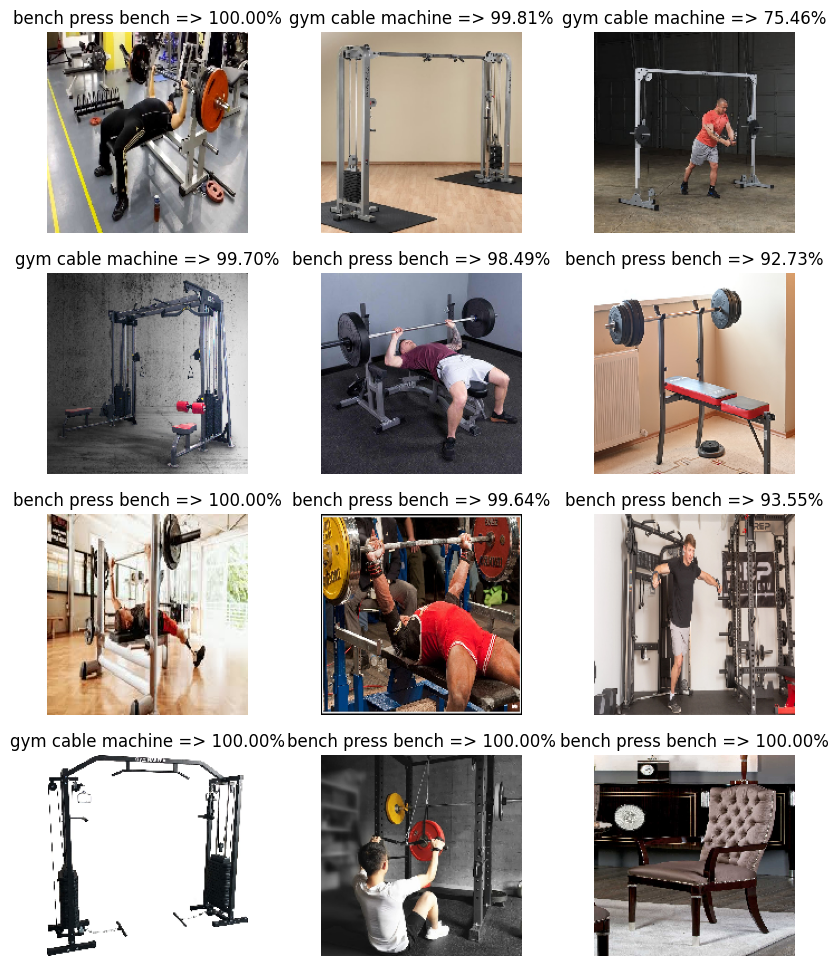

In [35]:
import tensorflow as tf
import numpy as np
import os
from PIL import Image
from matplotlib import pyplot as plt
import math

predictionImagesDir = './prediction'

imageNames = os.listdir(predictionImagesDir)
images = []
predictions = []
scores = []

tf.get_logger().setLevel('ERROR')
model = tf.keras.models.load_model('train_model.h5')

for img in imageNames:

    imgPath = os.path.join(predictionImagesDir, img)

    img = tf.keras.utils.load_img(imgPath, target_size=(180, 180))
    imgArray = tf.keras.utils.img_to_array(img)
    imgArray = tf.expand_dims(imgArray,0)
    prediction = model.predict(imgArray)
    score = tf.nn.softmax(prediction[0])

    classPrediction = class_names[np.argmax(score)]
    predictions.append(classPrediction)
    images.append(img)
    scores.append(100 * np.max(score))


plt.figure(figsize=(10, 12))
i = 0
amountImages = len(imageNames)
rows = int(amountImages/3)

for img, prediction, score in zip(images, predictions, scores):
    ax = plt.subplot(rows, 3, i + 1)
    plt.imshow(np.asarray(img))
    plt.title('{} => {:.2f}%'.format(prediction, score))
    plt.axis("off")
    i += 1
